In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Input

In [28]:
mnist = tf.keras.datasets.mnist #this mnist conatin images of 28X28 from 0 to 9 digits

In [29]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

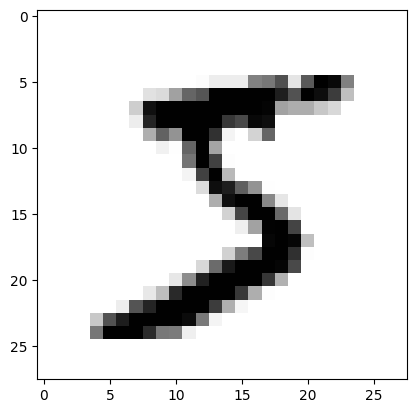

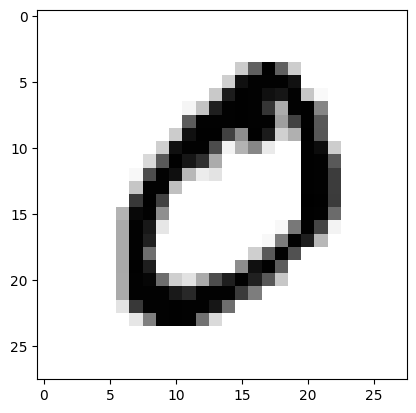

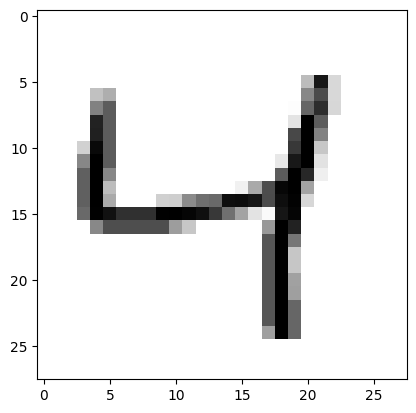

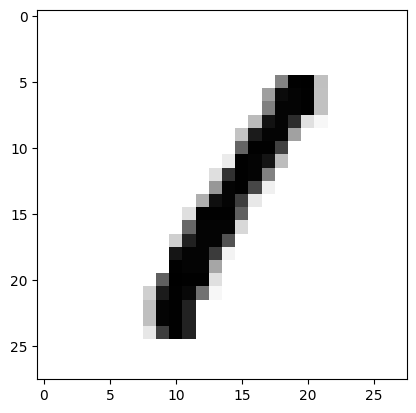

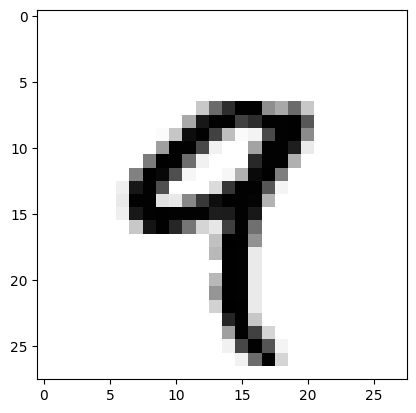

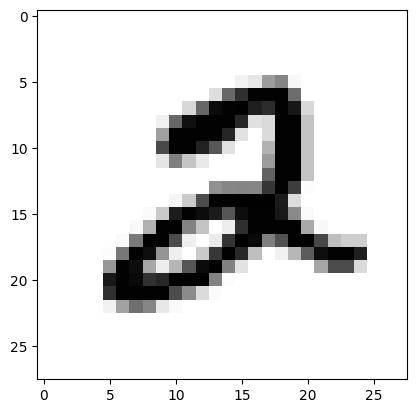

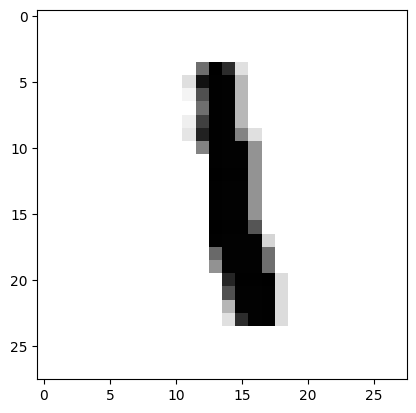

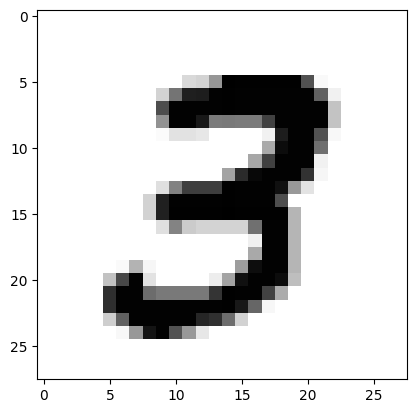

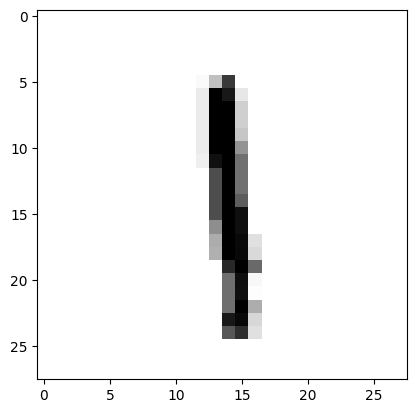

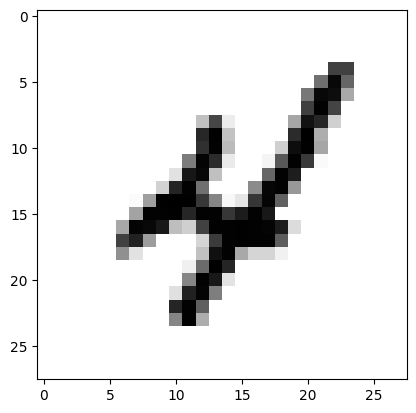

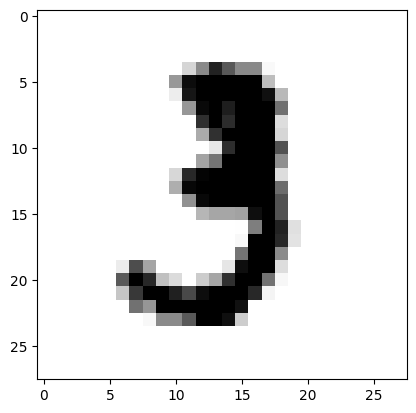

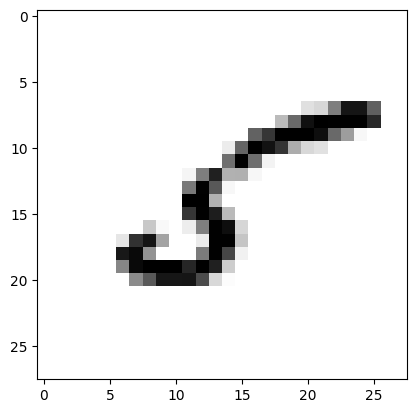

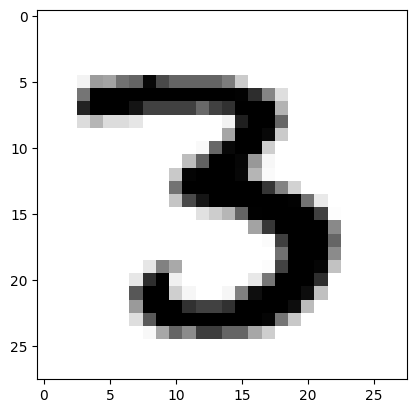

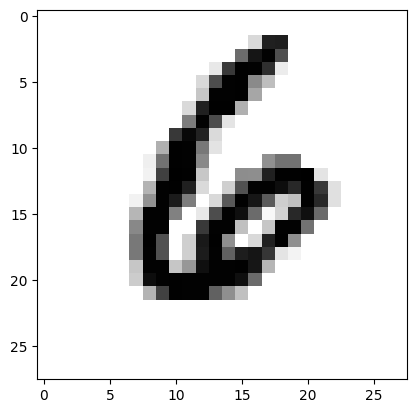

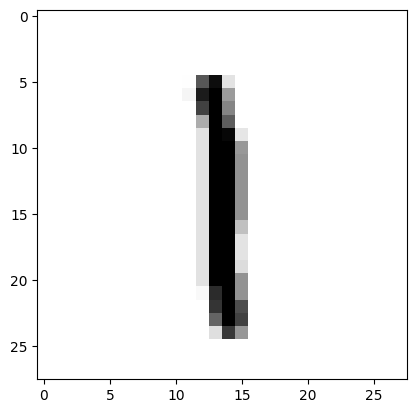

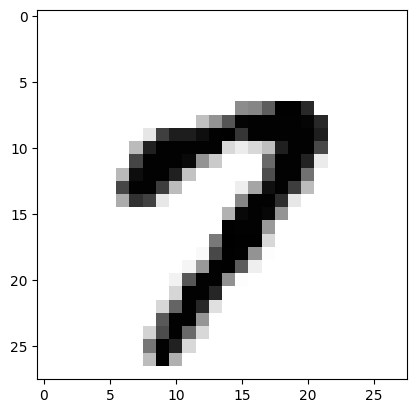

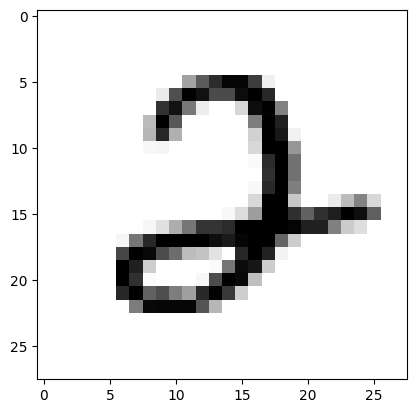

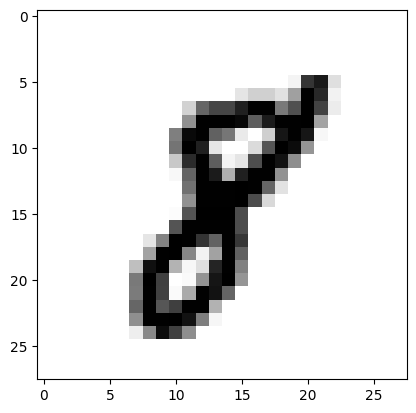

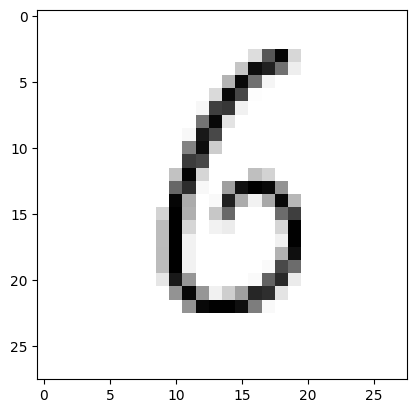

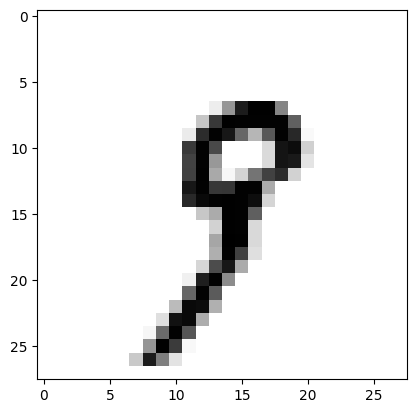

In [30]:
x_train.shape
for i in range (0, 20):
    plt.imshow(x_train[i], cmap = plt.cm.binary)
    plt.show()

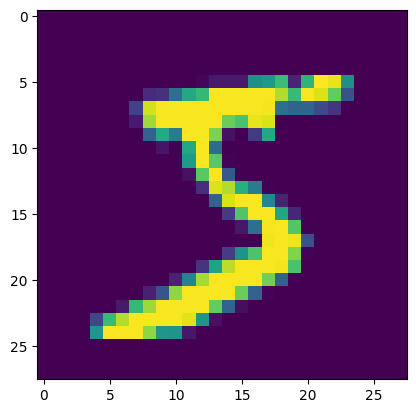

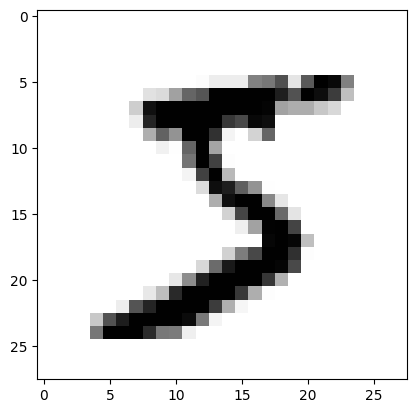

In [31]:
plt.imshow(x_train[0])
plt.show()
#there is no RGB COLOR 
#only the shades of grey (0 - 255) 
#->black 255->white
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [32]:
print(x_train[0]) #before normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

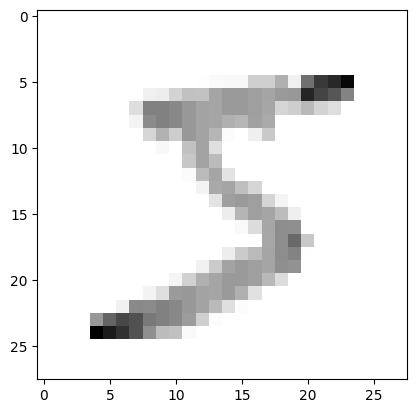

In [33]:
#normalizing
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [34]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [35]:
#resizing img to make it suitable for apply convolution operation
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training Samples dimensions :", x_trainr.shape)
print("Testing Samples dimensions :", x_testr.shape)

Training Samples dimensions : (60000, 28, 28, 1)
Testing Samples dimensions : (10000, 28, 28, 1)


### CREATING DEEP NEURAL NETWORK

In [36]:
# Creating a neural network
model = Sequential()

# First Convolution Layer
model.add(Conv2D(64, (3, 3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolution Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolution Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

# Output Layer
model.add(Dense(10))
model.add(Activation("softmax"))

In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.fit(x_trainr, y_train,epochs = 5, validation_split = 0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 57s 41ms/step - accuracy: 0.7801 - loss: 0.6767 - val_accuracy: 0.9549 - val_loss: 0.1491
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 51s 39ms/step - accuracy: 0.9672 - loss: 0.1089 - val_accuracy: 0.9717 - val_loss: 0.0966
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 52s 39ms/step - accuracy: 0.9774 - loss: 0.0722 - val_accuracy: 0.9740 - val_loss: 0.0857
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 51s 39ms/step - accuracy: 0.9819 - loss: 0.0572 - val_accuracy: 0.9781 - val_loss: 0.0707
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 53s 40ms/step - accuracy: 0.9857 - loss: 0.0432 - val_accuracy: 0.9823 - val_loss: 0.0632


In [40]:
model.save("model.h5")

In [41]:

test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss ion 10,000 test samples :", test_loss)
print("Validation Accuracy on 10,000 test samples : ", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9806 - loss: 0.0698
Test loss ion 10,000 test samples : 0.0572512149810791
Validation Accuracy on 10,000 test samples :  0.984499990940094


In [43]:
model.save("digit_recognition_model.keras")